In [3]:
# pip install ConBased==0.0.6

# pip install FacetClumps==0.0.3

The article [ConBased](https://www.sciencedirect.com/science/article/abs/pii/S2213133722000427).
    
    

The libraries required by **ConBased**: **numpy, skimage**
    
The libraries required by **FacetClumps**: **numpy, skimage, scipy**
    
Additional libraries that handles files and time: **astropy, time, tqdm**


In [21]:
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

import ConBased
import FacetClumps
from ConBased import Generate,Evaluate,Detect_ConBased
from FacetClumps import Detect_FacetClumps

# Examples for 2D --- ConBased

## Simulation Paremeters
### Input of generation
**n**: The number of simulated clumps.

**peak_low**: The min value of simulated peak.

**peak_up**: The max value of simulated peak.

**angle**: The angle of simulated clumps. We can choice a value in [0,360], if None,the angle is random in [0,360]

**rms**: The standard deviation of Gaussian noise.

**xres, yres, zres**: The length of the data cube

**sigma_one, sigma_two, sigma_three**: The standard deviation of Gaussian clumps or the size of simulated clumps. 

**ctime**: The truncation coefficient k, the truncation position is the product of k and sigma.\
Recommended value: [$2\sqrt{2ln2}$,3,4,5]


### Output of generation
**origin_data**: The data of simulated clumps.

**noise_data**: The data of simulated clumps with noise.

**infor_table**: The information table of simulated clumps. It's a dict.


### Simulated Information Table 
infor_table.keys(): dict_keys(['peak_value', 'peak_location', 'angle', 'clump_com', 'clump_size', 'clump_sum', 'clump_volume', 'clump_regions'])

**peak_value**: The peak value of the clumps.

**peak_location**: The peak location of the clumps.

**angle**: The angle of the clumps.

**clump_com**: The centroid location of the clumps.

**clump_size**: The size of the clumps.

**clump_sum**: The flux of the clumps.

**clump_volume**: The volume of the clumps.

**clump_regions**: The regional coordarates of each clump.

### Generation Code

In [22]:
n = 10 
peak_low = 0.69 
peak_up = 4.6 
angle = None 
rms = 0.23 
xres = 100 
yres = 100
zres = 100
sigma_one = [2,4]  
sigma_two = [2,4]
sigma_three = [2,4]
ctime = np.sqrt(8*np.log(2)) 

origin_data,noise_data,infor_table = Generate.Generate_2D(n,xres,yres,peak_low,peak_up,ctime,sigma_one,sigma_two,rms,angle)

### Generation Plot

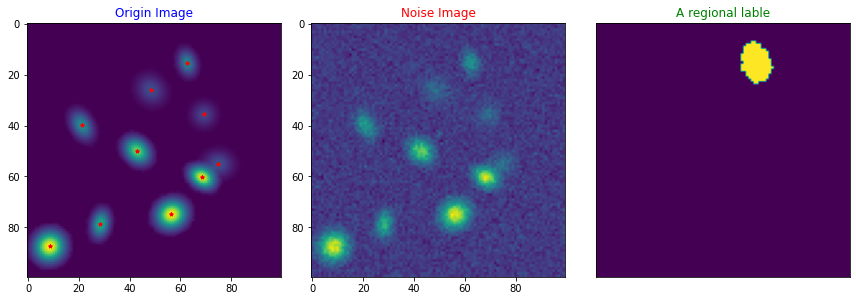

In [23]:
fig,(ax0,ax1,ax2)= plt.subplots(1,3, figsize=(12, 8))
clump_centers = infor_table['clump_com']
for i in range(len(clump_centers)):
    ax0.plot(clump_centers[i][1],clump_centers[i][0], 'r*', markersize=4)

index = 0
clump_region_i = infor_table['clump_regions'][index]   
clump_region_lable = np.zeros_like(origin_data)
clump_region_lable[clump_region_i] = 1

ax0.imshow(origin_data)
ax1.imshow(noise_data)
ax2.imshow(clump_region_lable)
ax0.set_title('Origin Image',fontsize=12,color='b')
ax1.set_title('Noise Image',fontsize=12,color='r')
ax2.set_title('A regional lable',fontsize=12,color='g')
fig.tight_layout()
plt.xticks([]),plt.yticks([])
plt.show()

## Detection Paremeters

### Input of ConBased  (2D and 3D)
**RMS**: The RMS of the data.

**Threshold**: The minimum intensity used to truncate the signals. \
Default Value: 2\*RMS \
Recommended value: ['mean','otsu',n\*RMS]

**DIntensity**: The intensity difference between the local maximum of a region and that of the connected-nearest region.\
Default Value: 2\*RMS\
Recommended value: [-3\*RMS,3\*RMS]

**RegionMin**: The minimum number of pixels of signal region.\
Default Value 2D/3D/LBV: 9/27/[9,3]\
Recommended value 2D: [9,16,25]\
Recommended value 3D: [27,64,125]\
Recommended value 3D LBV: [[9,3],[16,4],[25,5]]\

**ClumpMin**: The minimum number of pixels of a clump in the signal region which contains multiple local regions.\
Default Value 2D/3D/LBV: 25/216/[36,6]\
Recommended value 2D: [25,...]\
Recommended value 3D: [125,...]\
Recommended value 3D LBV: [[25,5],...]

**DDistance**: The distance difference between the local maximum of a region and that of the connected-nearest region.\
Default Value 2D/3D/LBV: 4/8/[6,6]\
Recommended value 2D: [4,...,8]\
Recommended value 3D: [6,...,10]\
Recommended value 3D LBV: [[4,4],...,[8,8]]

**The higher the resolution, the larger the values!**

### Output of ConBased
**did_ConBased**: The information table of simulated clumps. It's a dict.

### Detected Information Table 
did_ConBased.keys(): dict_keys(['peak_value', 'peak_location', 'clump_center', 'clump_size', 'clump_sum', 'clump_volume', 'clump_angle', 'clump_edge', 'regions_data'])

**peak_value**: The peak value of the clumps.

**peak_location**: The peak location of the clumps.

**clump_center**: The centroid location of the clumps.

**clump_size**: The size of the clumps.

**clump_sum**: The flux of the clumps.

**clump_volume**: The volume of the clumps.

**clump_angle**: The angle of the clumps.

**clump_edge**: Whether the clump touches the edge, 1-Yes,0-No.

**regions_data**: The regional mask.

### Detection code

In [4]:
#Parameters
RMS = 0.23
Threshold = 2*RMS
RegionMin = [9]
ClumpMin = [25]
DIntensity = 2*RMS
DDistance = [4]

#Choise Data
# origin_data = noise_data
# Sigma = 2*RMS
# filter_data = filters.gaussian(origin_data,Sigma)
# origin_data = filter_data

#Detecte
start = time.time()
did_ConBased = Detect_ConBased.Detect_ConBased_2D(RMS,Threshold,RegionMin,ClumpMin,DIntensity,DDistance,origin_data)
end = time.time()
print('Time:',end - start)
print('Dnumber:',len(did_ConBased['clump_com']))

100%|██████████| 10/10 [00:00<00:00, 55.77it/s]


Time: 0.20871615409851074
Dnumber: 10


### Detection Plot

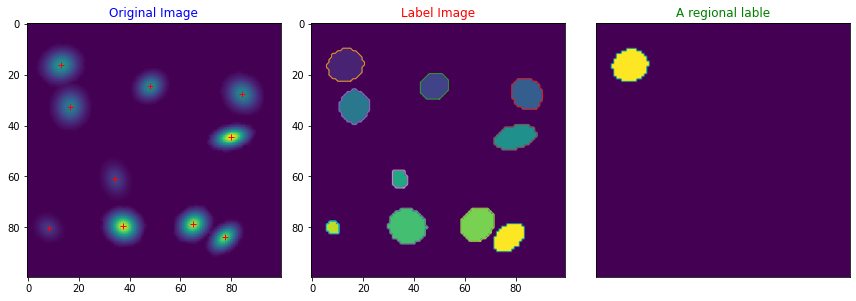

In [5]:
regions_data = did_ConBased['regions_data']
clump_center = did_ConBased['clump_com']

fig,(ax0,ax1,ax2)= plt.subplots(1,3, figsize=(12, 8))

for i in range(np.int(regions_data.max())):
    center_x = clump_center[i][0]
    center_y = clump_center[i][1]
    
    #Obtain the contour of a clump. 
    t_data = np.zeros_like(origin_data)
    core_x = np.array(np.where(regions_data == i)[0])
    core_y = np.array(np.where(regions_data == i)[1])
    t_data[core_x,core_y] = 1
    contours = measure.find_contours(t_data,0.5)
    
    ax0.plot(center_y,center_x,'r+')
#     ax2.text(center[i][1],center[i][0],'{}'.format(i+1),color='red')
    ax1.plot(contours[0][:,1],contours[0][:,0],linewidth = 1)

#Obtain the mask of a clump. 
index = 0
clump_region_i_coords = np.where(regions_data == index+1)
clump_region_lable = np.zeros_like(origin_data)
clump_region_lable[clump_region_i_coords] = 1

ax0.imshow(origin_data)
ax1.imshow(regions_data)
ax2.imshow(clump_region_lable)
# ax0.invert_yaxis()
ax0.set_title('Original Image',fontsize=12,color='b')
ax1.set_title('Label Image',fontsize=12,color='r')
ax2.set_title('A regional lable',fontsize=12,color='g')
fig.tight_layout()
plt.xticks([]),plt.yticks([])
plt.show()

## Evaluation Paremeters

### Input
**allow_dist**: Tolerable Euclidean distance error.

**origin_center**: The location of the original center needs to be matched.

**origin_flux**: Original flux.

**origin_regions**: Original regions. Type: List.

**detect_center**: The location of the detected center needs to be matched.

**detect_flux**: Detected flux.

**regions_data**: Detected regions. Type: Array.

### Output
**matched_id_i**: The matched index of origin_center.

**matched_id_j**: The matched index of detect_center.

**recall**: Recall rate.

**precision**: Precision rate.

**F1**: F1 score.

**delta_dist**: Euclidean distance error for two central locations.

**matched_flux**: The matched flux of origin_flux.

**delta_flux**: Flux fluctuation between origin_flux and detect_flux.

**IOU**: Intersection-over-union. The similarity between origin_regions and regions_data.

### Evaluation Code

In [6]:
allow_dist = 2
origin_center = infor_table['clump_com']
origin_flux = infor_table['clump_sum']
origin_regions = infor_table['clump_regions']
detect_center = did_ConBased['clump_com']
detect_flux = did_ConBased['clump_sum']
regions_data = did_ConBased['regions_data']

#If no flux information, we can assign the fluxes whatever we want, 
# such as origin_flux=np.zeros(len(origin_center)), detect_flux==np.zeros(len(detect_center))
# it doesn't matter to matched_id_i, matched_id_j, recall, precision, F1 and delta_dist. 

matched_id_i,matched_id_j,recall,precision,F1,delta_dist,matched_flux,delta_flux = \
            Evaluate.Evaluate_2D(origin_center,detect_center,origin_flux,detect_flux,allow_dist)
IOU = Evaluate.IOU_2D(origin_center,detect_center,origin_regions,regions_data,allow_dist)
print('ConBased recall:',recall)
print('ConBased precision:',precision)
print('ConBased F1:',F1)
print('ConBased Dist:',np.mean(delta_dist))
print('ConBased Flux:',np.mean(delta_flux))
print('ConBased IOU:',np.mean(IOU))

ConBased recall: 1.0
ConBased precision: 1.0
ConBased F1: 1.0
ConBased Dist: 0.03337752788660006
ConBased Flux: -0.20159476075379815
ConBased IOU: 0.4918397079801551


# Examples for 3D --- ConBased

The format is consistent with 2D

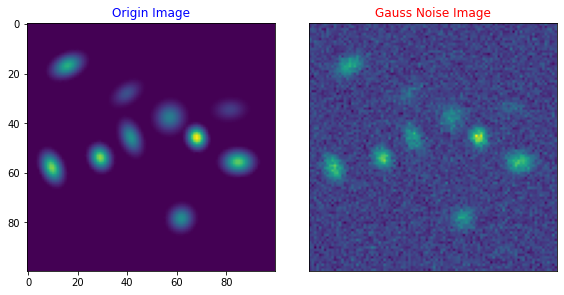

In [7]:
origin_data,noise_data,infor_dict = \
        Generate.Generate_3D(n,xres,yres,zres,peak_low,peak_up,ctime,sigma_one,sigma_two,sigma_three,rms,angle)

fig,(ax0,ax1)= plt.subplots(1,2, figsize=(8, 4))
ax0.imshow(origin_data.sum(0))
ax1.imshow(noise_data.sum(0))
ax0.set_title('Origin Image',fontsize=12,color='b')
ax1.set_title('Gauss Noise Image',fontsize=12,color='r')
fig.tight_layout()
plt.xticks([]),plt.yticks([])
plt.show()

### 3D, Each axis is equivalent

In [8]:
#Parameters
RMS = 0.23
Threshold = 2*RMS 
RegionMin = [27]
ClumpMin = [216] 
DIntensity = 2*RMS
DDistance = [8]

#Choise Data
# origin_data = noise_data

#Detecte
start = time.time()
did_ConBased = Detect_ConBased.Detect_ConBased_3D(RMS,Threshold,RegionMin,ClumpMin,DIntensity,DDistance,origin_data)
end = time.time()
print('Time:',end - start)
print('Dnumber:',len(did_ConBased['clump_com']))


100%|██████████| 10/10 [00:01<00:00,  6.53it/s]


Time: 1.7267646789550781
Dnumber: 10


### 3D, Treat the galactic plane and the velocity direction separately

In [9]:
#Parameters
RMS = 0.23
Threshold = 2*RMS
RegionMin = [16,5]
ClumpMin = [64,8]
DIntensity = 2*RMS
DDistance = [6,10]

#Choise Data
# origin_data = noise_data

#Detecte
start = time.time()
did_ConBased = Detect_ConBased.Detect_ConBased_3D_LBV(RMS,Threshold,RegionMin,ClumpMin,DIntensity,DDistance,origin_data)
end = time.time()
print('Time:',end - start)
print('Dnumber:',len(did_ConBased['clump_com']))


100%|██████████| 10/10 [00:02<00:00,  4.21it/s]

Time: 2.6362955570220947
Dnumber: 10


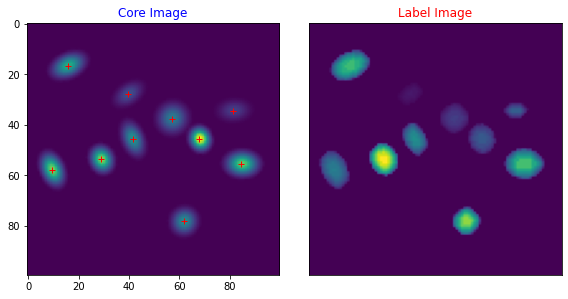

In [10]:
regions_data = did_ConBased['regions_data']
clump_center = did_ConBased['clump_center']

fig,(ax0,ax1)= plt.subplots(1,2, figsize=(8, 6))

for i in range(np.int(regions_data.max())):
    t_data = np.zeros_like(origin_data)
    core_x = np.array(np.where(regions_data == i+1)[1])
    core_y = np.array(np.where(regions_data == i+1)[2])
    center_x = clump_center[i][1]
    center_y = clump_center[i][2]
    ax0.plot(center_y,center_x,'r+')
    
ax0.imshow(origin_data.sum(0))
ax1.imshow(regions_data.sum(0))
# ax0.invert_yaxis()
ax0.set_title('Core Image',fontsize=12,color='b')
ax1.set_title('Label Image',fontsize=12,color='r')
fig.tight_layout()
plt.xticks([]),plt.yticks([])
plt.show()

### Evaluation Code

In [11]:
allow_dist = 2
origin_center = infor_dict['clump_center']
origin_flux = infor_dict['clump_sum']
origin_regions = infor_dict['clump_regions']
detect_center = did_ConBased['clump_center']
detect_flux = did_ConBased['clump_sum']
regions_data = did_ConBased['regions_data']

matched_id_i,matched_id_j,recall,precision,F1,delta_dist,matched_flux,delta_flux = \
            Evaluate.Evaluate_3D(origin_center,detect_center,origin_flux,detect_flux,allow_dist)
IOU = Evaluate.IOU_3D(origin_center,detect_center,origin_regions,regions_data,allow_dist)
print('ConBased recall:',recall)
print('ConBased precision:',precision)
print('ConBased F1:',F1)
print('ConBased Dist:',np.mean(delta_dist))
print('ConBased Flux:',np.mean(delta_flux))
print('ConBased IOU:',np.mean(IOU))

ConBased recall: 1.0
ConBased precision: 1.0
ConBased F1: 1.0
ConBased Dist: 0.031599002918607795
ConBased Flux: -0.23443725254657438
ConBased IOU: 0.45353158519427017


# Examples for 2D --- FacetClumps

## Detection Paremeters
### Input of FacetClumps (2D and 3D)
**RMS**: The RMS of the data.

**Threshold**: The minimum intensity used to truncate the signals. \
Default Value: 2\*RMS \
Recommended value: ['mean','otsu',n\*RMS]

**SWindow**: The scale of window function.\
Default Value: 3\
Recommended value: [3,5,7]

**KBins**: The coefficient used to calculate the number of bins for the eigenvalue.\
Default Value: 35\
Recommended value: [10,...,60]

**FwhmBeam**: The FWHM of the instrument beam, in pixels.\
Default Value: 2

**VeloRes**: The velocity resolution of the instrument, in channels.\
Default Value: 2

**SRecursionLBV**: The minimum area of a region in the spatial direction and the minimum length of a region in the velocity channels when a recursion terminates. Clumps also need to satisfy the conditions. [SRecursionLB,SRecursionV] for 3D, [SRecursionLB] for 2D.\
Default Value: [16,5]

**The higher the resolution, the larger the values!**

### Output of FacetClumps
**did_FacetClumps**: The information table of simulated clumps. It's a dict.

### Detected Information Table 
did_FacetClumps.keys(): dict_keys(['peak_value', 'peak_location', 'clump_center', 'clump_com', 'clump_size', 'clump_sum', 'clump_volume', 'clump_angle', 'clump_edge', 'regions_data'])

**peak_value**: The peak value of the clumps.

**peak_location**: The peak location of the clumps.

**clump_center**: The clump center detected by FacetClumps.

**clump_com**: The centroid location of the clumps.

**clump_size**: The size of the clumps.

**clump_sum**: The flux of the clumps.

**clump_volume**: The volume of the clumps.

**clump_angle**: The angle of the clumps.

**clump_edge**: Whether the clump touches the edge, 1-Yes,0-No.

**regions_data**: The regional mask.

In [17]:
#Parameters
RMS = 0.23
Threshold = 2 * RMS  # ['mean','otsu',n*RMS]
SWindow = 3
KBins = 35  # [10,...,60]
FwhmBeam = 2
VeloRes = 2
SRecursionLBV = [16, 5]  # [(2+FwhmBeam)**2,3+VeloRes]

#Generate
origin_data,noise_data,infor_table = Generate.Generate_2D(n,xres,yres,peak_low,peak_up,ctime,sigma_one,sigma_two,rms,angle)

#2D Detecte
start = time.time()
SRecursionLB = SRecursionLBV[0]
did_FacetClumps = Detect_FacetClumps.Detect_FacetClumps_2D(RMS,Threshold,SWindow,KBins,SRecursionLB,origin_data)
end = time.time()
print('Time:',end - start)
print('Dnumber:',len(did_FacetClumps['clump_center']))

100%|██████████| 7/7 [00:00<00:00, 12860.33it/s]

Time: 0.6862630844116211
Dnumber: 10


# Examples for 3D --- FacetClumps

In [19]:
#Parameters
RMS = 0.23
Threshold = 2 * RMS  # ['mean','otsu',n*RMS]
SWindow = 3
KBins = 35  # [10,...,60]
FwhmBeam = 2
VeloRes = 2
SRecursionLBV = [16, 5]  # [(2+FwhmBeam)**2,3+VeloRes]

#Generate
origin_data,noise_data,infor_dict = \
        Generate.Generate_3D(n,xres,yres,zres,peak_low,peak_up,ctime,sigma_one,sigma_two,sigma_three,rms,angle)

#3D Detecte
start = time.time()
did_FacetClumps = Detect_FacetClumps.Detect_FacetClumps_3D(RMS,Threshold,SWindow,KBins,SRecursionLBV,origin_data)
end = time.time()
print('Time:',end - start)
print('Dnumber:',len(did_FacetClumps['clump_center']))

100%|██████████| 9/9 [00:00<00:00, 11322.36it/s]


Time: 11.410202264785767
Dnumber: 10


# Note

1, Modules **Generate** and **Evaluate** exist only in **ConBased**.

2, Modules **Detect_ConBased**, **Detect_FacetClumps** and **Generate** are written according to the characteristics of Python. \
Therefore the position coordinates **start at 0**, \
the **first axis** corresponds to **V** in **WCS**, \
the **second axis** corresponds to **B**, \
and the **third axis** corresponds to **L**.